In [1]:
import pandas as pd

# Load cleaned dataset (update path)
df = pd.read_csv(r'C:\Users\advpi\ad688-employability-sp25A1-group10-3\region_analysis\lightcast_job_postings.csv')

# Convert SALARY to numeric and drop nulls
df['SALARY'] = pd.to_numeric(df['SALARY'], errors='coerce')
df = df.dropna(subset=['SALARY'])

# Tag AI vs Non-AI jobs
def tag_ai(row):
    title = str(row['TITLE_NAME']).lower()
    industry = str(row['NAICS_2022_2_NAME']).lower()
    
    if ('ai' in title or 'artificial intelligence' in title or 'machine learning' in title or
        'data scientist' in title or 'deep learning' in title or 'nlp' in title or 'ml' in title or
        'data engineer' in title or 'ml engineer' in title or 'scientist' in title or
        'computer vision' in title or 'robotics' in title or
        'professional, scientific, and technical services' in industry or 'information' in industry):
        return 'AI Career'
    else:
        return 'Non-AI Career'

df['Career_Type'] = df.apply(tag_ai, axis=1)
print(df['Career_Type'].value_counts())

# Group by STATE and Career Type → Avg Salary
state_salary = df.groupby(['STATE_NAME', 'Career_Type'])['SALARY'].mean().round(2).reset_index()
state_salary = state_salary.sort_values(by='SALARY', ascending=False)

# Show top 5 for each category
print("Top 5 States for AI Careers:")
print(state_salary[state_salary['Career_Type'] == 'AI Career'].head(5))

print("\nTop 5 States for Non-AI Careers:")
print(state_salary[state_salary['Career_Type'] == 'Non-AI Career'].head(5))

# Optional: save to CSV
# state_salary.to_csv('statewise_ai_vs_nonai_salary.csv', index=False)

C:\Users\advpi\AppData\Local\Temp\ipykernel_7712\4005893792.py:4: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\advpi\ad688-employability-sp25A1-group10-3\region_analysis\lightcast_job_postings.csv')


Career_Type
Non-AI Career    19095
AI Career        11713
Name: count, dtype: int64
Top 5 States for AI Careers:
   STATE_NAME Career_Type     SALARY
6    Arkansas   AI Career  144133.42
50    Montana   AI Career  143398.80
88    Vermont   AI Career  142056.59
70   Oklahoma   AI Career  141950.69
48   Missouri   AI Career  140295.18

Top 5 States for Non-AI Careers:
       STATE_NAME    Career_Type     SALARY
13    Connecticut  Non-AI Career  119981.12
15       Delaware  Non-AI Career  118958.14
89        Vermont  Non-AI Career  118892.86
91       Virginia  Non-AI Career  118879.33
41  Massachusetts  Non-AI Career  117756.62


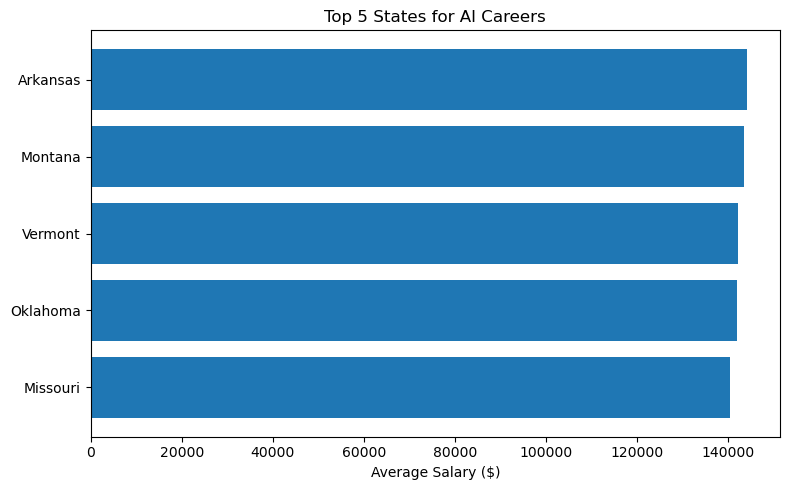

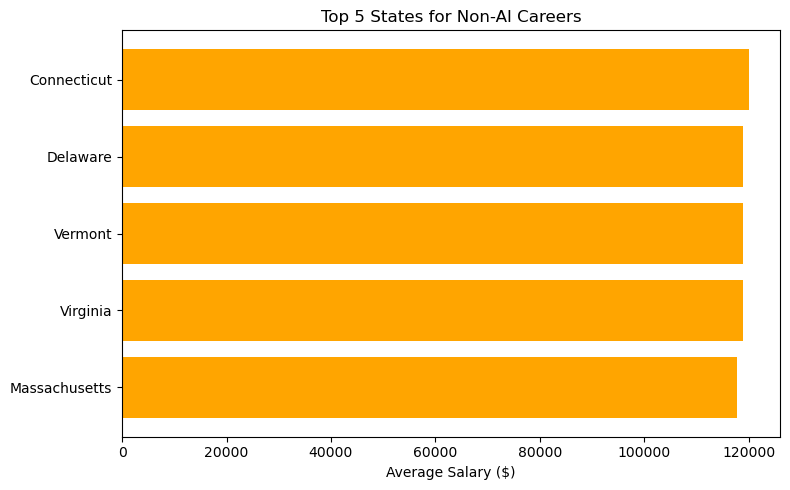

In [2]:
import matplotlib.pyplot as plt

# Top 5 AI states
top_ai = state_salary[state_salary['Career_Type'] == 'AI Career'].head(5)

# Top 5 Non-AI states
top_nonai = state_salary[state_salary['Career_Type'] == 'Non-AI Career'].head(5)

# Plot AI Career Salaries
plt.figure(figsize=(8, 5))
plt.barh(top_ai['STATE_NAME'], top_ai['SALARY'])
plt.xlabel("Average Salary ($)")
plt.title("Top 5 States for AI Careers")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top_ai_states.png")
plt.show()

# Plot Non-AI Career Salaries
plt.figure(figsize=(8, 5))
plt.barh(top_nonai['STATE_NAME'], top_nonai['SALARY'], color='orange')
plt.xlabel("Average Salary ($)")
plt.title("Top 5 States for Non-AI Careers")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top_nonai_states.png")
plt.show()


In [3]:
# Count of jobs used to compute avg salary
state_counts = df.groupby(['STATE_NAME', 'Career_Type'])['SALARY'].agg(['mean', 'count']).round(2).reset_index()
state_counts = state_counts.sort_values(by='mean', ascending=False)

# Show top 10 AI states by average salary + count
print(state_counts[state_counts['Career_Type'] == 'AI Career'].head(10))


        STATE_NAME Career_Type       mean  count
6         Arkansas   AI Career  144133.42    127
50         Montana   AI Career  143398.80     30
88         Vermont   AI Career  142056.59     32
70        Oklahoma   AI Career  141950.69    144
48        Missouri   AI Career  140295.18    192
12     Connecticut   AI Career  140156.16    167
42        Michigan   AI Career  140097.41    396
30          Kansas   AI Career  138880.23    122
76    Rhode Island   AI Career  138855.30     66
78  South Carolina   AI Career  138763.10     82


In [4]:
all_ai_states = state_counts[state_counts['Career_Type'] == 'AI Career']
print(all_ai_states['STATE_NAME'].unique())

['Arkansas' 'Montana' 'Vermont' 'Oklahoma' 'Missouri' 'Connecticut'
 'Michigan' 'Kansas' 'Rhode Island' 'South Carolina' 'Nebraska'
 'California' 'Washington' 'New Jersey' 'Louisiana' 'Iowa'
 'North Carolina' 'Pennsylvania' 'Indiana' 'Tennessee' 'Alabama'
 'Delaware' 'Florida' 'Minnesota' 'Nevada' 'Oregon' 'Idaho' 'Wisconsin'
 'Illinois' 'Arizona' 'Virginia' 'Maryland' 'Ohio' 'Texas' 'Kentucky'
 'Maine' 'Massachusetts' 'Colorado' 'Georgia'
 'Washington, D.C. (District of Columbia)' 'New York' 'New Hampshire'
 'Mississippi' 'Wyoming' 'South Dakota' 'New Mexico' 'Utah' 'Hawaii'
 'North Dakota' 'West Virginia' 'Alaska']


In [5]:
reliable_ai_states = state_counts[
    (state_counts['Career_Type'] == 'AI Career') &
    (state_counts['count'] >= 50)
].sort_values(by='mean', ascending=False)

print(reliable_ai_states.head(10))


        STATE_NAME Career_Type       mean  count
6         Arkansas   AI Career  144133.42    127
70        Oklahoma   AI Career  141950.69    144
48        Missouri   AI Career  140295.18    192
12     Connecticut   AI Career  140156.16    167
42        Michigan   AI Career  140097.41    396
30          Kansas   AI Career  138880.23    122
76    Rhode Island   AI Career  138855.30     66
78  South Carolina   AI Career  138763.10     82
52        Nebraska   AI Career  138461.39     75
8       California   AI Career  138374.79   1483


In [6]:
big_states = ['Massachusetts', 'New York', 'New Jersey', 'California', 'Texas']

ai_counts_big_states = df[
    (df['Career_Type'] == 'AI Career') & 
    (df['STATE_NAME'].isin(big_states))
].groupby('STATE_NAME')['SALARY'].agg(['count', 'mean']).round(2).sort_values(by='count', ascending=False)

ai_counts_big_states.rename(columns={'count': 'AI Job Postings', 'mean': 'Avg Salary ($)'}, inplace=True)

print(ai_counts_big_states)


               AI Job Postings  Avg Salary ($)
STATE_NAME                                    
California                1483       138374.79
Texas                      973       130898.40
New York                   606       125033.63
New Jersey                 350       137628.47
Massachusetts              300       129245.66


In [7]:
ai_median_salary = df[df['Career_Type'] == 'AI Career'].groupby('STATE_NAME')['SALARY'].median().round(2).reset_index()
ai_counts = df[df['Career_Type'] == 'AI Career'].groupby('STATE_NAME')['SALARY'].count().reset_index(name='Job_Count')

# Merge them
ai_summary = pd.merge(ai_median_salary, ai_counts, on='STATE_NAME')
ai_summary.columns = ['State', 'Median Salary ($)', 'AI Job Count']

# Optional: Filter for states with decent sample size
ai_summary = ai_summary[ai_summary['AI Job Count'] >= 50]

# Sort by Median Salary
ai_summary = ai_summary.sort_values(by='Median Salary ($)', ascending=False)

print(ai_summary.head(10))


             State  Median Salary ($)  AI Job Count
24        Missouri           143000.0           192
21        Michigan           143000.0           396
35        Oklahoma           142997.0           144
29      New Jersey           137500.0           350
41       Tennessee           137375.0           226
3         Arkansas           137000.0           127
26        Nebraska           134500.0            75
4       California           133865.0          1483
39  South Carolina           133525.0            82
49       Wisconsin           132800.0           167


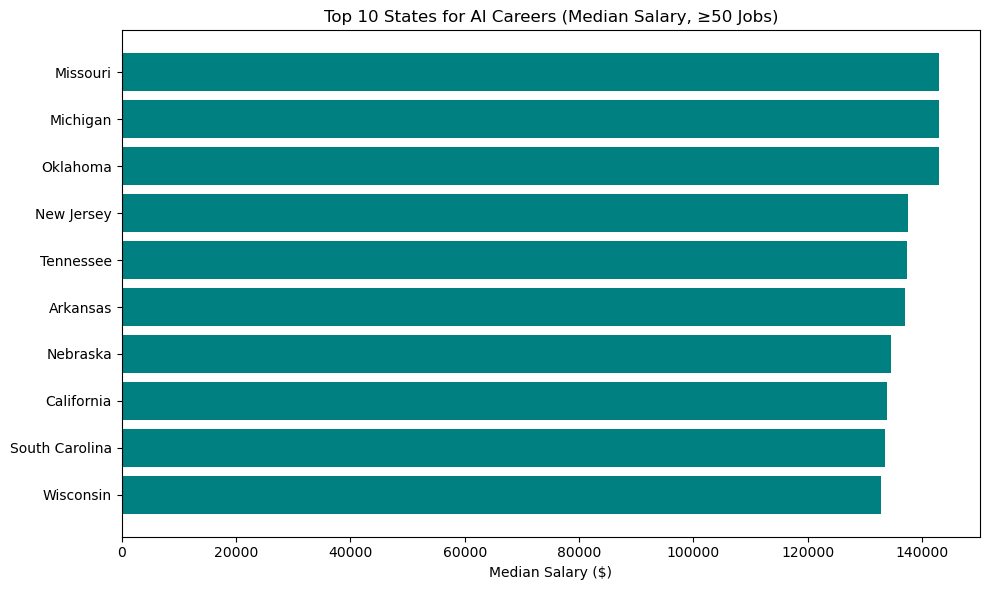

In [8]:
import matplotlib.pyplot as plt

top_states = ai_summary.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_states['State'], top_states['Median Salary ($)'], color='teal')
plt.xlabel("Median Salary ($)")
plt.title("Top 10 States for AI Careers (Median Salary, ≥50 Jobs)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("top_ai_states_median.png")
plt.show()


## Urban vs Rural States

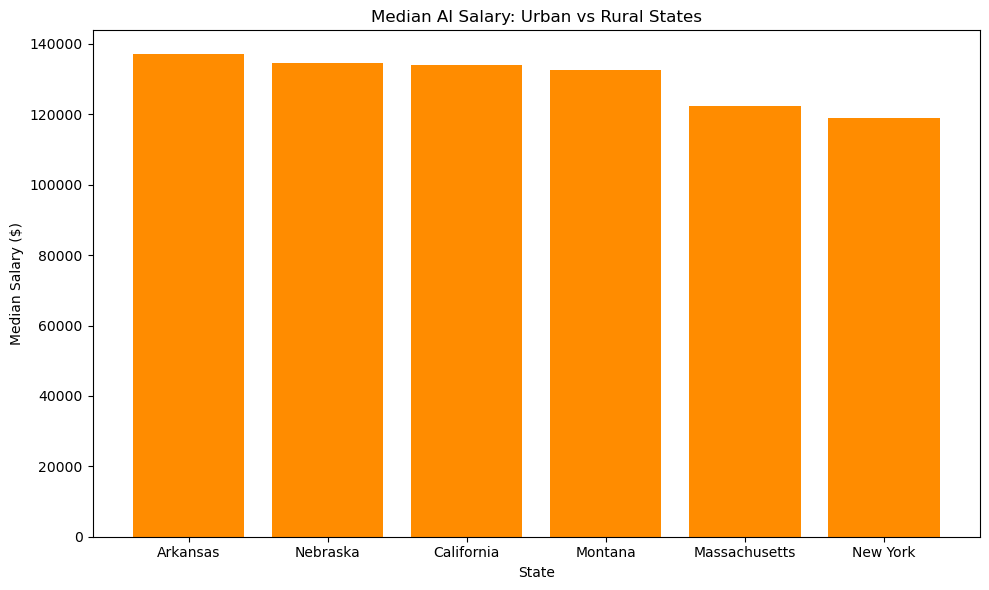

In [10]:
urban_states = ['California', 'New York', 'Massachusetts']
rural_states = ['Arkansas', 'Montana', 'Nebraska']

urban_vs_rural = geo_stats[
    (geo_stats['Career_Type'] == 'AI Career') &
    (geo_stats['STATE_NAME'].isin(urban_states + rural_states))
].sort_values(by='Median_Salary', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(urban_vs_rural['STATE_NAME'], urban_vs_rural['Median_Salary'], color='darkorange')
plt.xlabel("State")
plt.ylabel("Median Salary ($)")
plt.title("Median AI Salary: Urban vs Rural States")
plt.tight_layout()
plt.savefig("urban_vs_rural_ai_salaries.png")
plt.show()



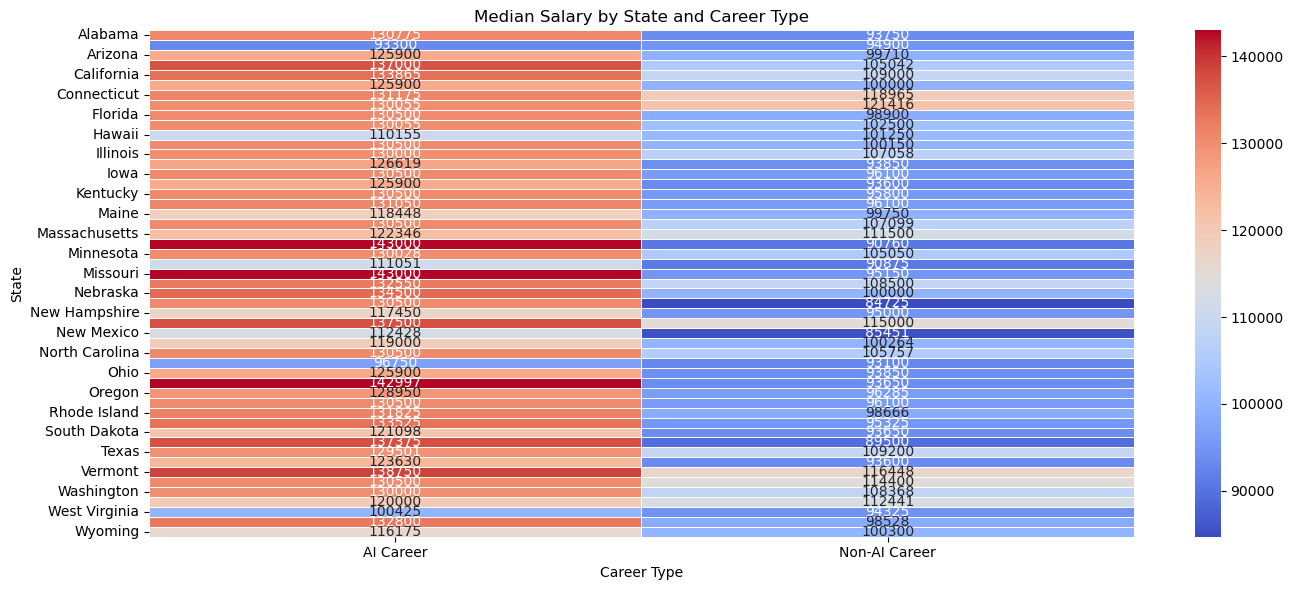

In [13]:
# Heatmap
import seaborn as sns 
pivot = df.groupby(['STATE_NAME', 'Career_Type'])['SALARY'].median().unstack()
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Median Salary by State and Career Type")
plt.xlabel("Career Type")
plt.ylabel("State")
plt.tight_layout()
plt.show()

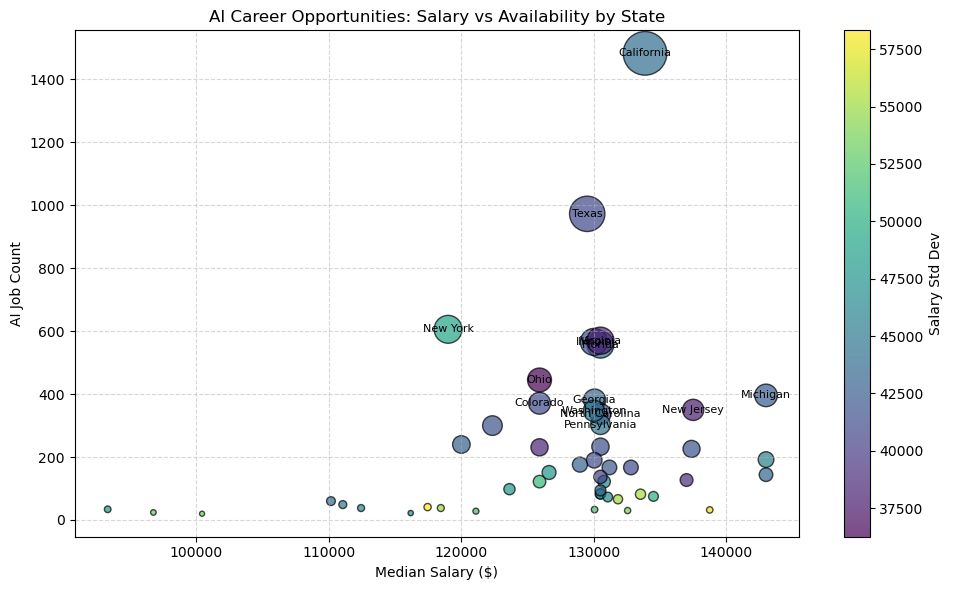

In [15]:
# Group by state
ai_summary = df[df['Career_Type'] == 'AI Career'].groupby('STATE_NAME')['SALARY'].agg(
    Median_Salary='median', Job_Count='count', Std_Dev='std').reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(ai_summary['Median_Salary'], ai_summary['Job_Count'],
            s=ai_summary['Job_Count'] / 1.5,
            c=ai_summary['Std_Dev'], cmap='viridis', alpha=0.7, edgecolors='black')
# Add state name labels to the bubbles
for i, row in ai_summary.iterrows():
    if row['Job_Count'] > 300:  # Label only big bubbles to reduce clutter
        plt.text(row['Median_Salary'], row['Job_Count'], row['STATE_NAME'],
                 fontsize=8, ha='center', va='center', color='black')

plt.colorbar(label='Salary Std Dev')
plt.xlabel('Median Salary ($)')
plt.ylabel('AI Job Count')
plt.title('AI Career Opportunities: Salary vs Availability by State')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


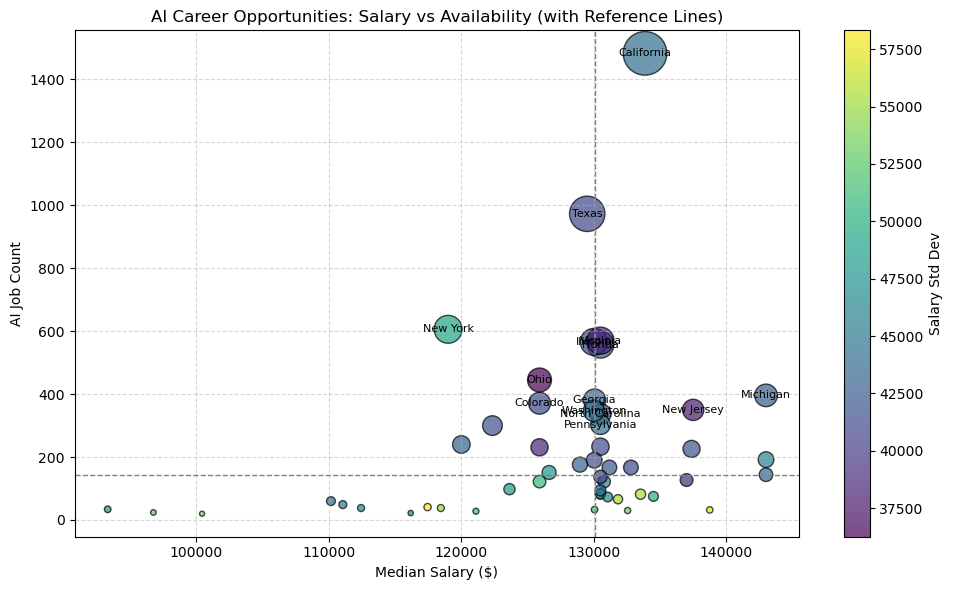

In [16]:
# Reference lines
median_salary_cutoff = ai_summary['Median_Salary'].median()
median_job_count_cutoff = ai_summary['Job_Count'].median()

plt.figure(figsize=(10, 6))
plt.scatter(ai_summary['Median_Salary'], ai_summary['Job_Count'],
            s=ai_summary['Job_Count'] / 1.5,
            c=ai_summary['Std_Dev'], cmap='viridis', alpha=0.7, edgecolors='black')

# Add quadrant lines
plt.axvline(median_salary_cutoff, color='gray', linestyle='--', linewidth=1)
plt.axhline(median_job_count_cutoff, color='gray', linestyle='--', linewidth=1)

# Label top states
for i, row in ai_summary.iterrows():
    if row['Job_Count'] > 300:
        plt.text(row['Median_Salary'], row['Job_Count'], row['STATE_NAME'],
                 fontsize=8, ha='center', va='center', color='black')

plt.colorbar(label='Salary Std Dev')
plt.xlabel('Median Salary ($)')
plt.ylabel('AI Job Count')
plt.title('AI Career Opportunities: Salary vs Availability (with Reference Lines)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### AI Salaries by State Heatmap

In [20]:
import plotly.express as px

# Mapping of full state names to 2-letter codes
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}

# Create dataframe with state abbreviations
ai_state_medians = df[df['Career_Type'] == 'AI Career'].groupby('STATE_NAME')['SALARY'].median().reset_index()
ai_state_medians['STATE_ABBR'] = ai_state_medians['STATE_NAME'].map(state_abbrev)

# Now plot
fig = px.choropleth(ai_state_medians,
                    locations='STATE_ABBR',
                    locationmode="USA-states",
                    color='SALARY',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    labels={'SALARY':'Median AI Salary'})
fig.update_layout(title_text='Median AI Salary by State', geo=dict(showlakes=True))
fig.show()



In [21]:
import plotly.graph_objects as go

# Prepare the base choropleth layer
fig = go.Figure(data=go.Choropleth(
    locations=ai_state_medians['STATE_ABBR'],  # 2-letter codes
    z=ai_state_medians['SALARY'],
    locationmode='USA-states',
    colorscale='Viridis',
    colorbar_title='Median AI Salary',
    text=ai_state_medians['STATE_NAME'],  # hover text
    hoverinfo='text+z'
))

# Add text annotations: state abbreviations
for i, row in ai_state_medians.iterrows():
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[None],  # plotly doesn’t support precise state centroids natively
        lat=[None],
        text=row['STATE_ABBR'],
        mode='text',
        textfont=dict(color='white', size=10),
        name=row['STATE_ABBR'],
        showlegend=False
    ))

# Update map layout
fig.update_layout(
    title_text='Median AI Salary by State (with State Labels)',
    geo=dict(
        scope='usa',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.show()


#### Non AI Careers

In [22]:
nonai_state_medians = df[df['Career_Type'] == 'Non-AI Career'].groupby('STATE_NAME')['SALARY'].median().reset_index()
nonai_state_medians['STATE_ABBR'] = nonai_state_medians['STATE_NAME'].map(state_abbrev)

In [23]:
ai_top = ai_state_medians[['STATE_NAME', 'SALARY']].rename(columns={'SALARY': 'AI_Median'})
nonai_top = nonai_state_medians[['STATE_NAME', 'SALARY']].rename(columns={'SALARY': 'NonAI_Median'})

comparison = pd.merge(ai_top, nonai_top, on='STATE_NAME', how='inner')
comparison['Diff'] = comparison['AI_Median'] - comparison['NonAI_Median']
comparison.sort_values(by='Diff', ascending=False).head(10)


,STATE_NAME,AI_Median,NonAI_Median,Diff
21,Michigan,143000.0,90760.0,52240.0
35,Oklahoma,142997.0,93650.0,49347.0
41,Tennessee,137375.0,89500.0,47875.0
24,Missouri,143000.0,95150.0,47850.0
27,Nevada,130500.0,84725.0,45775.0
39,South Carolina,133525.0,95325.0,38200.0
0,Alabama,130775.0,93750.0,37025.0
17,Louisiana,131050.0,96100.0,34950.0
16,Kentucky,130500.0,95800.0,34700.0
26,Nebraska,134500.0,100000.0,34500.0


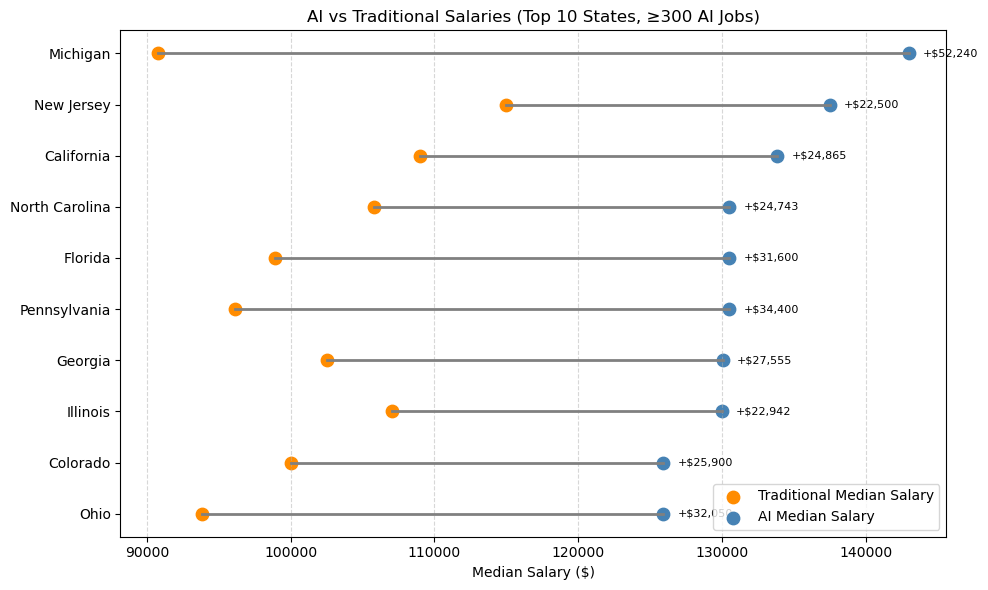

In [28]:
# Step 1: Get AI job counts per state
ai_counts = df[df['Career_Type'] == 'AI Career'].groupby('STATE_NAME')['SALARY'].count().reset_index(name='AI_Job_Count')

# Step 2: Merge counts into comparison
comparison_with_counts = pd.merge(comparison, ai_counts, on='STATE_NAME', how='left')

# Step 3: Filter for states with at least 100 AI jobs
filtered = comparison_with_counts[comparison_with_counts['AI_Job_Count'] >= 300]

# Step 4: Take top 10 states by salary gap
top_realistic = filtered.sort_values(by='Diff', ascending=False).head(10).sort_values('AI_Median')

# Step 5: Plot dumbbell chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Draw connecting lines
for _, row in top_realistic.iterrows():
    plt.plot([row['NonAI_Median'], row['AI_Median']], [row['STATE_NAME']] * 2, color='gray', linewidth=2)

# Plot salary points
plt.scatter(top_realistic['NonAI_Median'], top_realistic['STATE_NAME'], color='darkorange', label='Traditional Median Salary', s=80)
plt.scatter(top_realistic['AI_Median'], top_realistic['STATE_NAME'], color='steelblue', label='AI Median Salary', s=80)

# Annotate the difference
for _, row in top_realistic.iterrows():
    plt.text(row['AI_Median'] + 1000, row['STATE_NAME'], f"+${int(row['Diff']):,}", fontsize=8, va='center', color='black')

plt.xlabel("Median Salary ($)")
plt.title("AI vs Traditional Salaries (Top 10 States, ≥300 AI Jobs)")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Insight: Top States with Highest AI Salary Advantage (≥300 AI Jobs)

This chart compares the median salaries of AI-related and traditional careers in states with substantial AI job markets (300+ postings). Each line connects the traditional (orange) and AI (blue) median salaries for a given state, with the annotated value indicating the salary gap.

Key takeaways:
- **Michigan, California, and Florida** exhibit the most substantial salary premiums for AI roles, with gaps exceeding **$30,000–$50,000**.
- **New Jersey, Georgia, and Illinois** also show consistent advantages, reinforcing the value of AI specialization in large-scale markets.
- By filtering for states with significant job volume, we ensure these salary gaps are **statistically meaningful**, not outliers from niche postings.

This visualization reinforces that **AI careers aren't just higher paying — they're transformationally more lucrative** in regions where demand and infrastructure support sustainable opportunities.
